In [12]:
import pandas as pd

# Cargar datasets
df_2023 = pd.read_csv('data_set_2023.csv')
df_2024 = pd.read_csv('data_set_2024.csv')

# Unir datasets
df = pd.concat([df_2023, df_2024], ignore_index=True)

# Verificar que se hayan unido correctamente
print(df.shape)
df.head()


(73956, 21)


,Date,Source,Site ID,POC,Daily Mean PM10 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,AQS Parameter Code,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2023,AQS,60070008,3,7,ug/m3 SC,6,Chico-East Avenue,1,100.0,81102,PM10 Total 0-10um STP,122.0,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
1,01/02/2023,AQS,60070008,3,9,ug/m3 SC,8,Chico-East Avenue,1,100.0,81102,PM10 Total 0-10um STP,122.0,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
2,01/03/2023,AQS,60070008,3,5,ug/m3 SC,5,Chico-East Avenue,1,100.0,81102,PM10 Total 0-10um STP,122.0,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
3,01/04/2023,AQS,60070008,3,4,ug/m3 SC,4,Chico-East Avenue,1,100.0,81102,PM10 Total 0-10um STP,122.0,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
4,01/05/2023,AQS,60070008,3,3,ug/m3 SC,3,Chico-East Avenue,1,100.0,81102,PM10 Total 0-10um STP,122.0,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047


In [13]:
# Mostrar todas las columnas disponibles en el DataFrame
print("Columnas del dataset:\n")
print(df.columns.tolist())

# Información general de las columnas (tipo de dato, nulos, etc.)
print("\nInformación del DataFrame:\n")
print(df.info())

# Mostrar las primeras filas completas (sin cortar columnas)
pd.set_option('display.max_columns', None)
df.head()


Columnas del dataset:

['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM10 Concentration', 'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count', 'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description', 'Method Code', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State', 'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude']

Información del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73956 entries, 0 to 73955
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           73956 non-null  object 
 1   Source                         73956 non-null  object 
 2   Site ID                        73956 non-null  int64  
 3   POC                            73956 non-null  int64  
 4   Daily Mean PM10 Concentration  73956 non-null  int64  
 5   Units                          73956 non-null  object 
 6   Daily AQI Val

,Date,Source,Site ID,POC,Daily Mean PM10 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,AQS Parameter Code,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2023,AQS,60070008,3,7,ug/m3 SC,6,Chico-East Avenue,1,100.0,81102,PM10 Total 0-10um STP,122.0,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
1,01/02/2023,AQS,60070008,3,9,ug/m3 SC,8,Chico-East Avenue,1,100.0,81102,PM10 Total 0-10um STP,122.0,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
2,01/03/2023,AQS,60070008,3,5,ug/m3 SC,5,Chico-East Avenue,1,100.0,81102,PM10 Total 0-10um STP,122.0,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
3,01/04/2023,AQS,60070008,3,4,ug/m3 SC,4,Chico-East Avenue,1,100.0,81102,PM10 Total 0-10um STP,122.0,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047
4,01/05/2023,AQS,60070008,3,3,ug/m3 SC,3,Chico-East Avenue,1,100.0,81102,PM10 Total 0-10um STP,122.0,17020.0,"Chico, CA",6,California,7,Butte,39.76168,-121.84047


## Variable escogida a predecir: Daily Mean PM10 Concentration

In [14]:
#Limpiando el Dataset
# 1. Convertir la columna 'Date' a formato datetime
df["Date"] = pd.to_datetime(df["Date"])

# 2. Calcular el promedio diario de PM10 en California (all sites)
daily_pm10 = df.groupby("Date")["Daily Mean PM10 Concentration"].mean().reset_index()

# 3. Revisar la forma del nuevo DataFrame y sus primeras filas
print(daily_pm10.shape)
daily_pm10.head()


(731, 2)


,Date,Daily Mean PM10 Concentration
0,2023-01-01,23.164835
1,2023-01-02,8.709677
2,2023-01-03,10.270833
3,2023-01-04,8.041667
4,2023-01-05,10.404255


In [15]:
# imports necesarios (si aún no los importaste)
import numpy as np
import matplotlib.pyplot as plt

# --- Asegurar tipos correctos (ejecuta aunque ya lo hayas hecho) ---
df['Date'] = pd.to_datetime(df['Date'])
df['Daily Mean PM10 Concentration'] = pd.to_numeric(df['Daily Mean PM10 Concentration'], errors='coerce')

# --- Crear serie diaria (promedio entre sites) si aún no existe ---
daily_pm10 = df.groupby('Date')['Daily Mean PM10 Concentration'].mean().reset_index()

# --- Resample mensual: promedio de PM10 por mes ---
daily_pm10 = daily_pm10.set_index('Date')                     # index datetime necesario para resample
monthly_pm10 = daily_pm10.resample('M').mean().rename(columns={
    'Daily Mean PM10 Concentration': 'Monthly Mean PM10'
}).reset_index()

# --- Contar cuántos días medidos hubo por mes (útil para filtrar meses con poca cobertura) ---
obs_count = df.set_index('Date').resample('M')['Daily Mean PM10 Concentration'].count().reset_index(name='obs_count')
monthly_pm10 = monthly_pm10.merge(obs_count, on='Date')

# --- (Opcional) Filtrar meses con muy poca cobertura: por ejemplo al menos 15 días medidos ---
monthly_pm10 = monthly_pm10[monthly_pm10['obs_count'] >= 15].reset_index(drop=True)

# --- Crear variable numérica para el modelo: meses desde el inicio (0,1,2,...) ---
start = monthly_pm10['Date'].min()
monthly_pm10['month_num'] = (monthly_pm10['Date'].dt.year - start.year) * 12 + (monthly_pm10['Date'].dt.month - start.month)

# --- Vista rápida para comprobar ---
print(monthly_pm10.shape)
monthly_pm10.head()


(24, 4)


/tmp/ipython-input-2871606783.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_pm10 = daily_pm10.resample('M').mean().rename(columns={
/tmp/ipython-input-2871606783.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  obs_count = df.set_index('Date').resample('M')['Daily Mean PM10 Concentration'].count().reset_index(name='obs_count')


,Date,Monthly Mean PM10,obs_count,month_num
0,2023-01-31,15.376878,2985,0
1,2023-02-28,21.172054,2699,1
2,2023-03-31,11.796968,3105,2
3,2023-04-30,24.308769,2937,3
4,2023-05-31,23.143280,3107,4


## Definimos variables para entrenar

In [16]:
from sklearn.linear_model import LinearRegression

# --- Definir X (mes en número) e y (promedio de PM10 por mes) ---
X = monthly_pm10[['month_num']]   # variable independiente
y = monthly_pm10['Monthly Mean PM10']  # variable dependiente

# --- Crear y entrenar el modelo ---
model = LinearRegression()
model.fit(X, y)

# --- Coeficientes ---
print("Intercepto (b0):", model.intercept_)
print("Pendiente (b1):", model.coef_[0])


Intercepto (b0): 19.939362698320352
Pendiente (b1): 0.32646543389056615


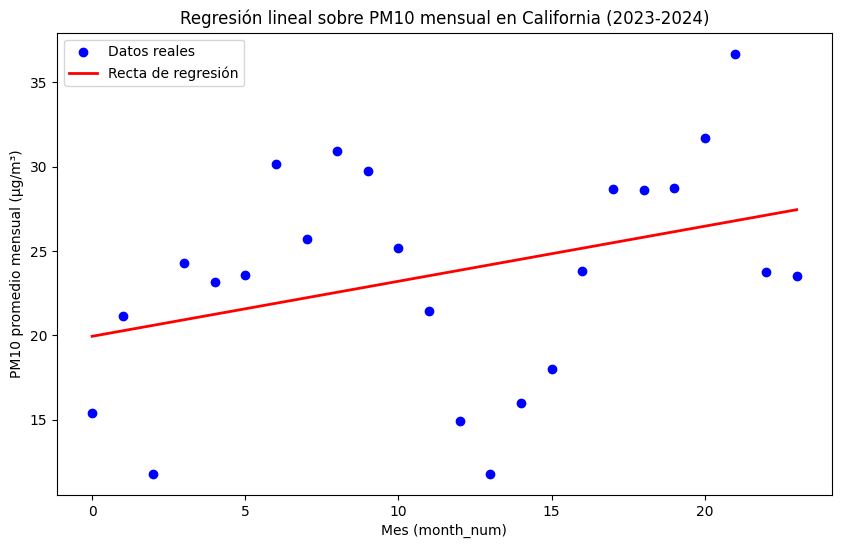

In [17]:
# --- Predicciones del modelo ---
y_pred = model.predict(X)

# --- Graficar ---
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Recta de regresión')
plt.xlabel("Mes (month_num)")
plt.ylabel("PM10 promedio mensual (µg/m³)")
plt.title("Regresión lineal sobre PM10 mensual en California (2023-2024)")
plt.legend()
plt.show()


In [22]:
from sklearn.model_selection import train_test_split

# Variables predictoras (X) y variable objetivo (y)
X = df_monthly[['Month']]
y = df_monthly['Daily Mean PM10 Concentration']

# División 70% entrenamiento - 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
r2 = model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Coeficiente de determinación (R²):", r2)
print("Error absoluto medio (MAE):", mae)
print("Error cuadrático medio (MSE):", mse)
print("Raíz del error cuadrático medio (RMSE):", rmse)


NameError: name 'df_monthly' is not defined

Intercepto (b0): 15.365277427077848
Pendiente (b1): 1.2995785404644213
Coeficiente de determinación (R²): 0.45844623316499933
Error absoluto medio (MAE): 3.917289120970035
Error cuadrático medio (MSE): 22.335536792512926
Raíz del error cuadrático medio (RMSE): 4.72604875054341


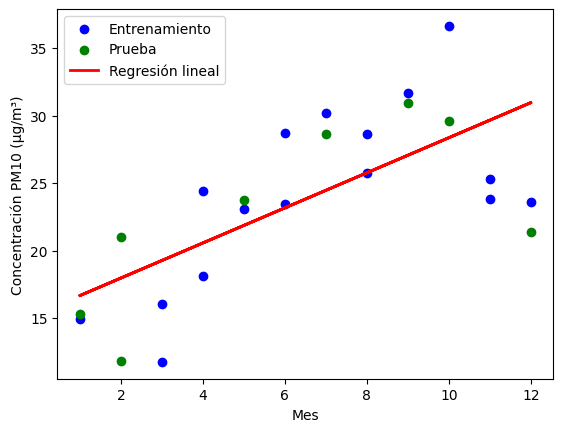

In [23]:
# ==============================
# 1. Importar librerías
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ==============================
# 2. Cargar datasets
# ==============================
df_2023 = pd.read_csv('data_set_2023.csv')
df_2024 = pd.read_csv('data_set_2024.csv')

# Unir datasets
df = pd.concat([df_2023, df_2024], ignore_index=True)

# ==============================
# 3. Procesar fechas y agrupar por mes
# ==============================
# Convertir a datetime
df['Date'] = pd.to_datetime(df['Date'])

# Crear columna "Month" (año-mes)
df['Month'] = df['Date'].dt.to_period('M')

# Agrupar por mes y calcular promedio de PM10
df_monthly = df.groupby('Month').agg({
    'Daily Mean PM10 Concentration': 'mean'
}).reset_index()

# Convertir "Month" a número para regresión
df_monthly['Month'] = df_monthly['Month'].astype(str)
df_monthly['Month'] = pd.to_datetime(df_monthly['Month'])
df_monthly['Month'] = df_monthly['Month'].dt.month

# ==============================
# 4. Definir variables (X, y)
# ==============================
X = df_monthly[['Month']]
y = df_monthly['Daily Mean PM10 Concentration']

# ==============================
# 5. División train-test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ==============================
# 6. Entrenar modelo
# ==============================
model = LinearRegression()
model.fit(X_train, y_train)

# ==============================
# 7. Predicciones y evaluación
# ==============================
y_pred = model.predict(X_test)

r2 = model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Intercepto (b0):", model.intercept_)
print("Pendiente (b1):", model.coef_[0])
print("Coeficiente de determinación (R²):", r2)
print("Error absoluto medio (MAE):", mae)
print("Error cuadrático medio (MSE):", mse)
print("Raíz del error cuadrático medio (RMSE):", rmse)

# ==============================
# 8. Visualización
# ==============================
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Prueba')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regresión lineal')
plt.xlabel("Mes")
plt.ylabel("Concentración PM10 (µg/m³)")
plt.legend()
plt.show()


## Hacer la predicción del modelo entrenado para 2025

    Mes  Predicción PM10 (µg/m³)
0     1                16.664856
1     2                17.964435
2     3                19.264013
3     4                20.563592
4     5                21.863170
5     6                23.162749
6     7                24.462327
7     8                25.761906
8     9                27.061484
9    10                28.361063
10   11                29.660641
11   12                30.960220


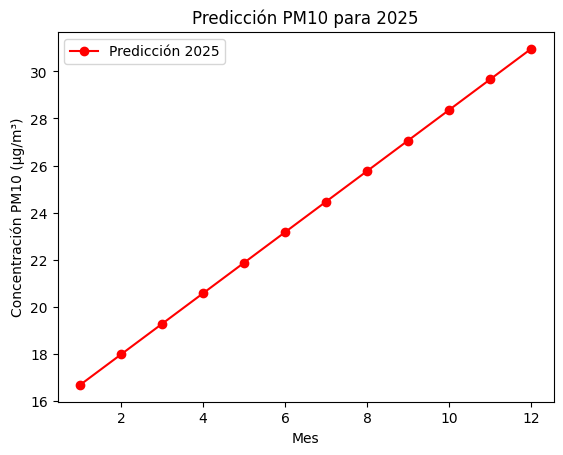

In [24]:

# Crear un DataFrame con los meses de 2025
X_2025 = pd.DataFrame({'Month': np.arange(1, 13)})

# Hacer predicciones
y_2025_pred = model.predict(X_2025)

# Guardar resultados en DataFrame
predicciones_2025 = pd.DataFrame({
    'Mes': np.arange(1, 13),
    'Predicción PM10 (µg/m³)': y_2025_pred
})

print(predicciones_2025)


plt.plot(predicciones_2025['Mes'], predicciones_2025['Predicción PM10 (µg/m³)'],
         marker='o', color='red', label='Predicción 2025')
plt.xlabel("Mes")
plt.ylabel("Concentración PM10 (µg/m³)")
plt.title("Predicción PM10 para 2025")
plt.legend()
plt.show()


## Comparación con el dataset original de 2025


In [25]:
df_2025 = pd.read_csv('data_set_2025.csv')


In [26]:
df_2025['Date'] = pd.to_datetime(df_2025['Date'])
df_2025['Month'] = df_2025['Date'].dt.to_period('M')

df_2025_monthly = df_2025.groupby('Month').agg({
    'Daily Mean PM10 Concentration': 'mean'
}).reset_index()

# Convertir Month a número para graficar
df_2025_monthly['Month'] = df_2025_monthly['Month'].astype(str)
df_2025_monthly['Month'] = pd.to_datetime(df_2025_monthly['Month'])
df_2025_monthly['Month'] = df_2025_monthly['Month'].dt.month


In [29]:
# Crear DataFrame con las predicciones (enero–diciembre 2025)
predicciones_2025_df = pd.DataFrame({
    'Month': np.arange(1, 13),  # usar el mismo nombre de columna que df_2025_monthly
    'Predicción PM10 (µg/m³)': y_2025_pred
})

# Renombrar la columna real y unir
df_2025_monthly = df_2025_monthly.rename(
    columns={'Daily Mean PM10 Concentration': 'Real PM10 (µg/m³)'}
)

comparacion_2025 = pd.merge(
    predicciones_2025_df,
    df_2025_monthly[['Month', 'Real PM10 (µg/m³)']],
    on='Month',
    how='left'   # mantiene los 12 meses y NaN si faltan reales
)

print(comparacion_2025)



    Month  Predicción PM10 (µg/m³)  Real PM10 (µg/m³)
0       1                16.664856          24.966091
1       2                17.964435          16.137980
2       3                19.264013          16.531200
3       4                20.563592          20.999289
4       5                21.863170          26.741172
5       6                23.162749          28.412068
6       7                24.462327          23.622976
7       8                25.761906          29.721987
8       9                27.061484          27.707510
9      10                28.361063                NaN
10     11                29.660641                NaN
11     12                30.960220                NaN


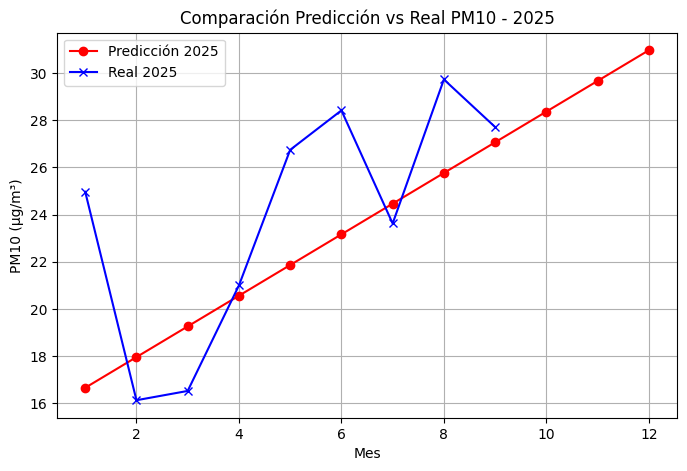

In [30]:
plt.figure(figsize=(8,5))
plt.plot(comparacion_2025['Month'], comparacion_2025['Predicción PM10 (µg/m³)'],
         marker='o', color='red', label='Predicción 2025')
plt.plot(comparacion_2025['Month'], comparacion_2025['Real PM10 (µg/m³)'],
         marker='x', color='blue', label='Real 2025')
plt.xlabel("Mes")
plt.ylabel("PM10 (µg/m³)")
plt.title("Comparación Predicción vs Real PM10 - 2025")
plt.legend()
plt.grid(True)
plt.show()


In [31]:
# Filtrar solo meses con datos reales
comparacion_valida = comparacion_2025.dropna()

mae_2025 = mean_absolute_error(comparacion_valida['Real PM10 (µg/m³)'],
                               comparacion_valida['Predicción PM10 (µg/m³)'])
rmse_2025 = np.sqrt(mean_squared_error(comparacion_valida['Real PM10 (µg/m³)'],
                                       comparacion_valida['Predicción PM10 (µg/m³)']))

print("MAE (Error absoluto medio):", mae_2025)
print("RMSE (Raíz error cuadrático medio):", rmse_2025)


MAE (Error absoluto medio): 3.207664394498865
RMSE (Raíz error cuadrático medio): 4.055981823908759


In [32]:
comparacion_valida['Error (%)'] = (
    (comparacion_valida['Predicción PM10 (µg/m³)'] - comparacion_valida['Real PM10 (µg/m³)'])
    / comparacion_valida['Real PM10 (µg/m³)'] * 100
)

print(comparacion_valida[['Month', 'Predicción PM10 (µg/m³)', 'Real PM10 (µg/m³)', 'Error (%)']])


   Month  Predicción PM10 (µg/m³)  Real PM10 (µg/m³)  Error (%)
0      1                16.664856          24.966091 -33.250039
1      2                17.964435          16.137980  11.317742
2      3                19.264013          16.531200  16.531244
3      4                20.563592          20.999289  -2.074818
4      5                21.863170          26.741172 -18.241542
5      6                23.162749          28.412068 -18.475667
6      7                24.462327          23.622976   3.553116
7      8                25.761906          29.721987 -13.323743
8      9                27.061484          27.707510  -2.331590


/tmp/ipython-input-2342073713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparacion_valida['Error (%)'] = (


In [35]:
# Calcular error porcentual para cada mes (comparación predicción vs real)
comparacion_2025['Error (%)'] = (
    (comparacion_2025['Predicción PM10 (µg/m³)'] - comparacion_2025['Real PM10 (µg/m³)'])
    / comparacion_2025['Real PM10 (µg/m³)'] * 100
)

In [36]:
# Calcular MAPE y precisión
mape = np.mean(np.abs(comparacion_2025['Error (%)']))
precision = 100 - mape

print(f"MAPE del modelo: {mape:.2f}%")
print(f"Precisión del modelo: {precision:.2f}%")


MAPE del modelo: 13.23%
Precisión del modelo: 86.77%


## Diagrama de Dispersión

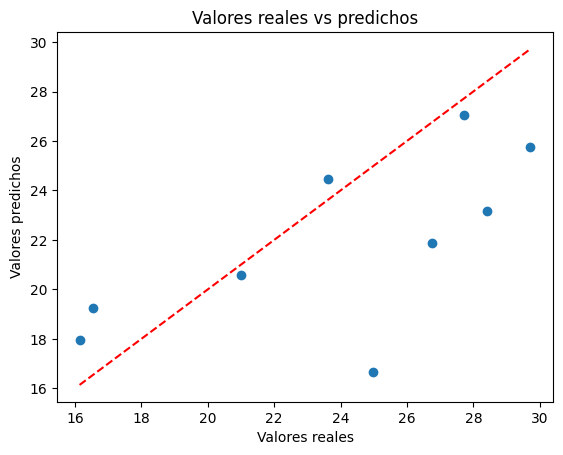

In [37]:
import matplotlib.pyplot as plt

plt.scatter(comparacion_2025['Real PM10 (µg/m³)'], comparacion_2025['Predicción PM10 (µg/m³)'])
plt.plot([comparacion_2025['Real PM10 (µg/m³)'].min(), comparacion_2025['Real PM10 (µg/m³)'].max()],
         [comparacion_2025['Real PM10 (µg/m³)'].min(), comparacion_2025['Real PM10 (µg/m³)'].max()],
         color='red', linestyle='--')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs predichos')
plt.show()


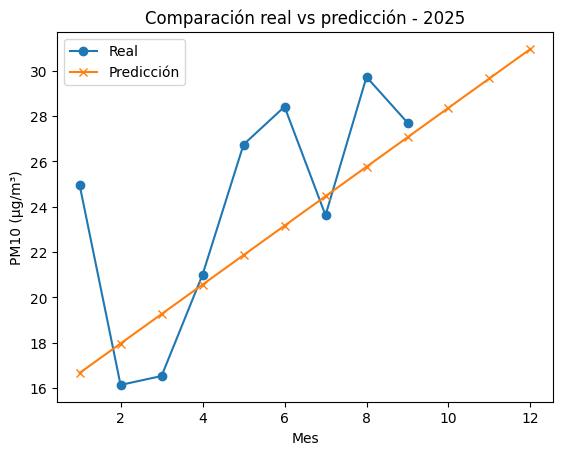

In [39]:
plt.plot(comparacion_2025['Month'], comparacion_2025['Real PM10 (µg/m³)'], marker='o', label='Real')
plt.plot(comparacion_2025['Month'], comparacion_2025['Predicción PM10 (µg/m³)'], marker='x', label='Predicción')
plt.xlabel('Mes')
plt.ylabel('PM10 (µg/m³)')
plt.title('Comparación real vs predicción - 2025')
plt.legend()
plt.show()
